# Case 6 in R

In [1]:
# load offline dataset
txt = readLines("data/offline.final.trace.txt")

In [2]:
# peruse data
head(txt)

[1] "# timestamp=2006-02-11 08:31:58"                                                                                                                                                                                                                                                                                                                                                                                                                                 
[2] "# usec=250"                                                                                                                                                                                                                                                                                                                                                                                                                                                      
[3] "# minReadings=110"                                                                                                                                                                                                                                                                                                                                                                                                                                               
[4] "t=1139643118358;id=00:02:2D:21:0F:33;pos=0.0,0.0,0.0;degree=0.0;00:14:bf:b1:97:8a=-38,2437000000,3;00:14:bf:b1:97:90=-56,2427000000,3;00:0f:a3:39:e1:c0=-53,2462000000,3;00:14:bf:b1:97:8d=-65,2442000000,3;00:14:bf:b1:97:81=-65,2422000000,3;00:14:bf:3b:c7:c6=-66,2432000000,3;00:0f:a3:39:dd:cd=-75,2412000000,3;00:0f:a3:39:e0:4b=-78,2462000000,3;00:0f:a3:39:e2:10=-87,2437000000,3;02:64:fb:68:52:e6=-88,2447000000,1;02:00:42:55:31:00=-84,2457000000,1"
[5] "t=1139643118744;id=00:02:2D:21:0F:33;pos=0.0,0.0,0.0;degree=0.0;00:14:bf:b1:97:8a=-38,2437000000,3;00:0f:a3:39:e1:c0=-54,2462000000,3;00:14:bf:b1:97:90=-56,2427000000,3;00:14:bf:3b:c7:c6=-67,2432000000,3;00:14:bf:b1:97:81=-66,2422000000,3;00:14:bf:b1:97:8d=-70,2442000000,3;00:0f:a3:39:e0:4b=-79,2462000000,3;00:0f:a3:39:dd:cd=-73,2412000000,3;00:0f:a3:39:e2:10=-83,2437000000,3;02:00:42:55:31:00=-85,2457000000,1"                                   
[6] "t=1139643119002;id=00:02:2D:21:0F:33;pos=0.0,0.0,0.0;degree=0.0;00:14:bf:b1:97:8a=-38,2437000000,3;00:0f:a3:39:e1:c0=-54,2462000000,3;00:14:bf:b1:97:90=-57,2427000000,3;00:14:bf:b1:97:81=-66,2422000000,3;00:14:bf:3b:c7:c6=-69,2432000000,3;00:14:bf:b1:97:8d=-70,2442000000,3;00:0f:a3:39:e0:4b=-78,2462000000,3;00:0f:a3:39:e2:10=-83,2437000000,3;00:0f:a3:39:dd:cd=-65,2412000000,3;02:64:fb:68:52:e6=-90,2447000000,1"

In [3]:
cat('Number of rows of text: ', length(txt))
cat("\nNumber of commented rows of text: ", sum(substr(txt, 1, 1) == "#"))
cat("\nSignals = Rows minus Comments: ", length(txt)-sum(substr(txt, 1, 1) == "#"))

Number of rows of text:  151392
Number of commented rows of text:  5312
Signals = Rows minus Comments:  146080

## Understanding the dataset

In [4]:
# Check row 4, the first line that's not a comment
strsplit(txt[4], ";")[[1]]

[1] "t=1139643118358"                    "id=00:02:2D:21:0F:33"              
 [3] "pos=0.0,0.0,0.0"                    "degree=0.0"                        
 [5] "00:14:bf:b1:97:8a=-38,2437000000,3" "00:14:bf:b1:97:90=-56,2427000000,3"
 [7] "00:0f:a3:39:e1:c0=-53,2462000000,3" "00:14:bf:b1:97:8d=-65,2442000000,3"
 [9] "00:14:bf:b1:97:81=-65,2422000000,3" "00:14:bf:3b:c7:c6=-66,2432000000,3"
[11] "00:0f:a3:39:dd:cd=-75,2412000000,3" "00:0f:a3:39:e0:4b=-78,2462000000,3"
[13] "00:0f:a3:39:e2:10=-87,2437000000,3" "02:64:fb:68:52:e6=-88,2447000000,1"
[15] "02:00:42:55:31:00=-84,2457000000,1"

In [5]:
# splitting to exptract individual data tokens
unlist(lapply(strsplit(txt[4], ";")[[1]],
              function(x)
                sapply(strsplit(x, "=")[[1]], strsplit, ",")))

t       1139643118358                  id   00:02:2D:21:0F:33 
                "t"     "1139643118358"                "id" "00:02:2D:21:0F:33" 
                pos        0.0,0.0,0.01        0.0,0.0,0.02        0.0,0.0,0.03 
              "pos"               "0.0"               "0.0"               "0.0" 
             degree                 0.0   00:14:bf:b1:97:8a   -38,2437000000,31 
           "degree"               "0.0" "00:14:bf:b1:97:8a"               "-38" 
  -38,2437000000,32   -38,2437000000,33   00:14:bf:b1:97:90   -56,2427000000,31 
       "2437000000"                 "3" "00:14:bf:b1:97:90"               "-56" 
  -56,2427000000,32   -56,2427000000,33   00:0f:a3:39:e1:c0   -53,2462000000,31 
       "2427000000"                 "3" "00:0f:a3:39:e1:c0"               "-53" 
  -53,2462000000,32   -53,2462000000,33   00:14:bf:b1:97:8d   -65,2442000000,31 
       "2462000000"                 "3" "00:14:bf:b1:97:8d"               "-65" 
  -65,2442000000,32   -65,2442000000,33   00:14:bf:b1:97:81   -65,2422000000,31 
       "2442000000"                 "3" "00:14:bf:b1:97:81"               "-65" 
  -65,2422000000,32   -65,2422000000,33   00:14:bf:3b:c7:c6   -66,2432000000,31 
       "2422000000"                 "3" "00:14:bf:3b:c7:c6"               "-66" 
  -66,2432000000,32   -66,2432000000,33   00:0f:a3:39:dd:cd   -75,2412000000,31 
       "2432000000"                 "3" "00:0f:a3:39:dd:cd"               "-75" 
  -75,2412000000,32   -75,2412000000,33   00:0f:a3:39:e0:4b   -78,2462000000,31 
       "2412000000"                 "3" "00:0f:a3:39:e0:4b"               "-78" 
  -78,2462000000,32   -78,2462000000,33   00:0f:a3:39:e2:10   -87,2437000000,31 
       "2462000000"                 "3" "00:0f:a3:39:e2:10"               "-87" 
  -87,2437000000,32   -87,2437000000,33   02:64:fb:68:52:e6   -88,2447000000,11 
       "2437000000"                 "3" "02:64:fb:68:52:e6"               "-88" 
  -88,2447000000,12   -88,2447000000,13   02:00:42:55:31:00   -84,2457000000,11 
       "2447000000"                 "1" "02:00:42:55:31:00"               "-84" 
  -84,2457000000,12   -84,2457000000,13 
       "2457000000"                 "1"

### Data Tokenization

In [6]:
tokens = strsplit(txt[4], "[;=,]")[[1]]

In [7]:
tokens

[1] "t"                 "1139643118358"     "id"               
 [4] "00:02:2D:21:0F:33" "pos"               "0.0"              
 [7] "0.0"               "0.0"               "degree"           
[10] "0.0"               "00:14:bf:b1:97:8a" "-38"              
[13] "2437000000"        "3"                 "00:14:bf:b1:97:90"
[16] "-56"               "2427000000"        "3"                
[19] "00:0f:a3:39:e1:c0" "-53"               "2462000000"       
[22] "3"                 "00:14:bf:b1:97:8d" "-65"              
[25] "2442000000"        "3"                 "00:14:bf:b1:97:81"
[28] "-65"               "2422000000"        "3"                
[31] "00:14:bf:3b:c7:c6" "-66"               "2432000000"       
[34] "3"                 "00:0f:a3:39:dd:cd" "-75"              
[37] "2412000000"        "3"                 "00:0f:a3:39:e0:4b"
[40] "-78"               "2462000000"        "3"                
[43] "00:0f:a3:39:e2:10" "-87"               "2437000000"       
[46] "3"                 "02:64:fb:68:52:e6" "-88"              
[49] "2447000000"        "1"                 "02:00:42:55:31:00"
[52] "-84"               "2457000000"        "1"

In [8]:
tokens[1:10]

[1] "t"                 "1139643118358"     "id"               
 [4] "00:02:2D:21:0F:33" "pos"               "0.0"              
 [7] "0.0"               "0.0"               "degree"           
[10] "0.0"

In [9]:
# tokens for time, MAC address, x, y, z, orientation
tokens[c(2, 4, 6:8, 10)]

[1] "1139643118358"     "00:02:2D:21:0F:33" "0.0"              
[4] "0.0"               "0.0"               "0.0"

In [10]:
# tokens for MAC address, signal, channel, device type
tokens[-(1:10)]

[1] "00:14:bf:b1:97:8a" "-38"               "2437000000"       
 [4] "3"                 "00:14:bf:b1:97:90" "-56"              
 [7] "2427000000"        "3"                 "00:0f:a3:39:e1:c0"
[10] "-53"               "2462000000"        "3"                
[13] "00:14:bf:b1:97:8d" "-65"               "2442000000"       
[16] "3"                 "00:14:bf:b1:97:81" "-65"              
[19] "2422000000"        "3"                 "00:14:bf:3b:c7:c6"
[22] "-66"               "2432000000"        "3"                
[25] "00:0f:a3:39:dd:cd" "-75"               "2412000000"       
[28] "3"                 "00:0f:a3:39:e0:4b" "-78"              
[31] "2462000000"        "3"                 "00:0f:a3:39:e2:10"
[34] "-87"               "2437000000"        "3"                
[37] "02:64:fb:68:52:e6" "-88"               "2447000000"       
[40] "1"                 "02:00:42:55:31:00" "-84"              
[43] "2457000000"        "1"

### MAC-specific tokens are split into a matrix (i.e. mat)

In [11]:
tmp = matrix(tokens[ - (1:10) ], ncol = 4, byrow = TRUE)
mat = cbind(matrix(tokens[c(2, 4, 6:8, 10)], nrow = nrow(tmp),
                   ncol = 6, byrow = TRUE),
tmp)

In [12]:
dim(mat)

[1] 11 10

In [13]:
# example of a matrix for MAC 00:02:2D:21:0F:33
mat

1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:8a,-38,2437000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:90,-56,2427000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:0f:a3:39:e1:c0,-53,2462000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:8d,-65,2442000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:81,-65,2422000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:3b:c7:c6,-66,2432000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:0f:a3:39:dd:cd,-75,2412000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:0f:a3:39:e0:4b,-78,2462000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:0f:a3:39:e2:10,-87,2437000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,02:64:fb:68:52:e6,-88,2447000000,1
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,02:00:42:55:31:00,-84,2457000000,1


In [14]:
# Nolan and Lang function for creating each individual matrix
processLine =
function(x)
{
  tokens = strsplit(x, "[;=,]")[[1]]
  tmp = matrix(tokens[ - (1:10) ], ncol = 4, byrow = TRUE)
  cbind(matrix(tokens[c(2, 4, 6:8, 10)], nrow = nrow(tmp),
ncol = 6, byrow = TRUE), tmp)
}

In [15]:
# using the processLine function to create each matrix
tmp = lapply(txt[4:20], processLine)
sapply(tmp, nrow)

[1] 11 10 10 11  9 10  9  9 10 11 11  9  9  9  8 10 14

In [16]:
### all matrices prior to merger into a single dataframe
tmp

1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:8a,-38,2437000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:90,-56,2427000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:0f:a3:39:e1:c0,-53,2462000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:8d,-65,2442000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:81,-65,2422000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:3b:c7:c6,-66,2432000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:0f:a3:39:dd:cd,-75,2412000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:0f:a3:39:e0:4b,-78,2462000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:0f:a3:39:e2:10,-87,2437000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,02:64:fb:68:52:e6,-88,2447000000,1
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,02:00:42:55:31:00,-84,2457000000,1


In [17]:
# merge all matrices to a single dataframe
offline = as.data.frame(do.call("rbind", tmp), 
                        stringsAsFactors = FALSE)
dim(offline)

[1] 170  10

In [18]:
dim(offline)
head(offline)

[1] 170  10

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:8a,-38,2437000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:90,-56,2427000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:0f:a3:39:e1:c0,-53,2462000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:8d,-65,2442000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:81,-65,2422000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:3b:c7:c6,-66,2432000000,3


In [19]:
# use processLine function for rows 4 - 20
tmp = lapply(txt[4:20], processLine)

# merge signals from all macs
offline = as.data.frame(do.call("rbind", tmp))

lines = txt[ substr(txt, 1, 1) != "#" ]

# modified procesLine function to take rows without signals
processLine = function(x)
{
  tokens = strsplit(x, "[;=,]")[[1]]
  
  if (length(tokens) == 10) 
    return(NULL)
 
  tmp = matrix(tokens[ - (1:10) ], , 4, byrow = TRUE)
  cbind(matrix(tokens[c(2, 4, 6:8, 10)], nrow(tmp), 6, 
               byrow = TRUE), tmp)
}

In [20]:
# merging all matrices
options(error = recover, warn = 1)
tmp = lapply(lines, processLine)

# put it in a dataframe style structure
offline = as.data.frame(do.call("rbind", tmp),
stringsAsFactors = FALSE)

# size of offline dataframe after data cleansing
dim(offline)

[1] 1181628      10

In [21]:
dim(offline)
head(offline)

[1] 1181628      10

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:8a,-38,2437000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:90,-56,2427000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:0f:a3:39:e1:c0,-53,2462000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:8d,-65,2442000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:81,-65,2422000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:3b:c7:c6,-66,2432000000,3


In [22]:
# assign descriptive header names to the offline dataframe
names(offline) = c("time", "scanMac", "posX", "posY", "posZ",
                   "orientation", "mac", "signal",
                   "channel", "type")

In [23]:
head(offline, 3)

time,scanMac,posX,posY,posZ,orientation,mac,signal,channel,type
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:8a,-38,2437000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:90,-56,2427000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:0f:a3:39:e1:c0,-53,2462000000,3


### Exploring numeric variables

In [24]:
# convert position, singal, & tiime to numeric type
numVars = c("time", "posX", "posY", "posZ",
            "orientation", "signal")
offline[ numVars ] =  lapply(offline[ numVars ], as.numeric)

In [25]:
# peruse numeric variables for anomalies (e.g. posZ = 0)
summary(offline[, numVars])

      time                posX            posY             posZ  
 Min.   :1.140e+12   Min.   : 0.00   Min.   : 0.000   Min.   :0  
 1st Qu.:1.140e+12   1st Qu.: 2.00   1st Qu.: 3.000   1st Qu.:0  
 Median :1.140e+12   Median :12.00   Median : 6.000   Median :0  
 Mean   :1.140e+12   Mean   :13.73   Mean   : 5.876   Mean   :0  
 3rd Qu.:1.140e+12   3rd Qu.:23.00   3rd Qu.: 8.000   3rd Qu.:0  
 Max.   :1.142e+12   Max.   :33.00   Max.   :13.000   Max.   :0  
  orientation        signal      
 Min.   :  0.0   Min.   :-99.00  
 1st Qu.: 90.0   1st Qu.:-73.00  
 Median :180.0   Median :-62.00  
 Mean   :167.2   Mean   :-63.85  
 3rd Qu.:270.0   3rd Qu.:-55.00  
 Max.   :359.9   Max.   :-25.00  

### Exploring categorical variables

In [26]:
# peruse categroical variables for anomalies
summary(sapply(offline[ , c("mac", "channel","scanMac")],
                as.factor))

                mac               channel                    scanMac       
 00:0f:a3:39:e1:c0:145862   2462000000:189774   00:02:2D:21:0F:33:1181628  
 00:0f:a3:39:dd:cd:145619   2437000000:152124                              
 00:14:bf:b1:97:8a:132962   2412000000:145619                              
 00:14:bf:3b:c7:c6:126529   2432000000:126529                              
 00:14:bf:b1:97:90:122315   2427000000:122315                              
 00:14:bf:b1:97:8d:121325   2442000000:121325                              
 (Other)          :387016   (Other)   :323942                              

In [27]:
# Drop adhoc records and the `type` field altogether since the model only 
# requires signals from access points
offline = offline[ offline$type == "3", ]
offline = offline[ , "type" != names(offline) ]

# addition of new variables
offline$rawTime = offline$time
offline$time = offline$time/1000
class(offline$time) = c("POSIXt", "POSIXct")

# drop scanMac and posZ
offline = offline[ , !(names(offline) %in% c("scanMac", "posZ"))]

head(offline, 3)

time,posX,posY,orientation,mac,signal,channel,rawTime
2006-02-10 23:31:58,0,0,0,00:14:bf:b1:97:8a,-38,2437000000,1.139643e+12
2006-02-10 23:31:58,0,0,0,00:14:bf:b1:97:90,-56,2427000000,1.139643e+12
2006-02-10 23:31:58,0,0,0,00:0f:a3:39:e1:c0,-53,2462000000,1.139643e+12


In [28]:
dim(offline)
head(offline)

[1] 978443      8

time,posX,posY,orientation,mac,signal,channel,rawTime
2006-02-10 23:31:58,0,0,0,00:14:bf:b1:97:8a,-38,2437000000,1.139643e+12
2006-02-10 23:31:58,0,0,0,00:14:bf:b1:97:90,-56,2427000000,1.139643e+12
2006-02-10 23:31:58,0,0,0,00:0f:a3:39:e1:c0,-53,2462000000,1.139643e+12
2006-02-10 23:31:58,0,0,0,00:14:bf:b1:97:8d,-65,2442000000,1.139643e+12
2006-02-10 23:31:58,0,0,0,00:14:bf:b1:97:81,-65,2422000000,1.139643e+12
2006-02-10 23:31:58,0,0,0,00:14:bf:3b:c7:c6,-66,2432000000,1.139643e+12


In [29]:
# columns by datatype
unlist(lapply(offline, class))

time1       time2        posX        posY orientation         mac 
   "POSIXt"   "POSIXct"   "numeric"   "numeric"   "numeric" "character" 
     signal     channel     rawTime 
  "numeric" "character"   "numeric"

### Exploring `orientation`

In [30]:
# Check unique values for orientation. There should only be 8 values per guidelines, 
# i.e. intervals of 45 between 0 and 315
unique(offline$orientation)

[1]   0.0  45.2  90.3 135.9 180.3 225.6 270.1 315.0  45.1  90.7 135.2 180.1
 [13] 225.7 269.7 315.3   0.3  45.5  90.5 135.7 180.2 225.0 270.9 315.2   0.7
 [25]  45.7  89.8 225.2 269.9   0.4  90.4 134.8 180.4   0.2  45.6 135.0 179.6
 [37] 225.4 269.5 179.2 224.5  89.9 134.4 269.4 359.9  90.1 135.1 270.2 314.8
 [49] 313.8  45.8  90.8 134.9 225.9 270.5 315.9  45.4 134.7 180.0 224.9 269.8
 [61] 314.4   0.1  44.3 225.3 315.7   0.5  44.8  89.4 226.0 315.1   0.8  89.2
 [73] 180.8 224.8 315.8  44.4 180.5 314.9  44.9 179.8 315.5 135.6   0.6 135.4
 [85] 179.9 225.1 270.0  45.3 270.4  45.0  90.6  46.0   0.9  44.6 135.3  90.2
 [97] 134.2  44.5 134.5 226.1 269.6 270.3 315.4   1.5 135.8 179.4 314.7  90.0
[109] 225.5 314.5 180.9 135.5  47.6 226.5  89.7 136.7 270.8 225.8 270.7 181.5
[121] 270.6 359.7 180.6  45.9  46.3 359.6 268.3 224.6   1.0 180.7 315.6 224.7
[133] 223.4  91.0 224.4 271.5 179.3 269.0 359.8  89.6 226.9 314.6 134.3   2.0
[145]  89.0 316.5 179.7 224.0 271.0   1.2 136.0 314.0 268.4  91.5 134.6 226.3
[157] 226.2 324.5 179.5 271.6 358.3  91.2  46.5 271.3 359.5 269.3 316.3  44.7
[169] 271.2  90.9 136.6 136.5 136.3  46.8 316.0 269.2 181.1  44.2  91.1 314.2
[181]  89.1 314.3  46.6 358.8 358.6 358.7  88.8 182.7 182.8 224.1 316.8   7.9
[193] 181.0 359.3  89.5 316.1 316.6 359.1 134.0 226.4   2.1 227.0 228.1

In [31]:
# create function to convert orientation values to the nearest 45 degree angle
roundOrientation = function(angles) {
  refs = seq(0, by = 45, length  = 9)
  q = sapply(angles, function(o) which.min(abs(o - refs)))
  c(refs[1:8], 0)[q]
}
offline$angle = roundOrientation(offline$orientation)
unique(offline$angle)          

[1]   0  45  90 135 180 225 270 315

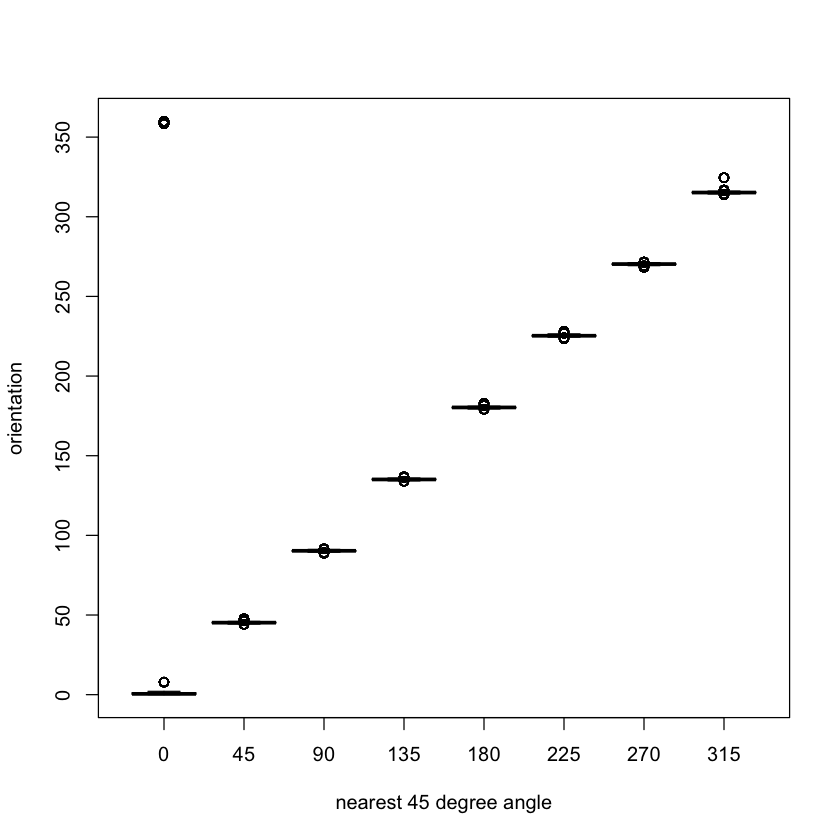

In [32]:
with(offline, boxplot(orientation ~ angle,
                      xlab = "nearest 45 degree angle",
                      ylab="orientation"))

In [33]:
dim(offline)
head(offline)

[1] 978443      9

time,posX,posY,orientation,mac,signal,channel,rawTime,angle
2006-02-10 23:31:58,0,0,0,00:14:bf:b1:97:8a,-38,2437000000,1.139643e+12,0
2006-02-10 23:31:58,0,0,0,00:14:bf:b1:97:90,-56,2427000000,1.139643e+12,0
2006-02-10 23:31:58,0,0,0,00:0f:a3:39:e1:c0,-53,2462000000,1.139643e+12,0
2006-02-10 23:31:58,0,0,0,00:14:bf:b1:97:8d,-65,2442000000,1.139643e+12,0
2006-02-10 23:31:58,0,0,0,00:14:bf:b1:97:81,-65,2422000000,1.139643e+12,0
2006-02-10 23:31:58,0,0,0,00:14:bf:3b:c7:c6,-66,2432000000,1.139643e+12,0


### Exploring `mac`

In [34]:
# checking for correlation between mac and channel
c(length(unique(offline$mac)), length(unique(offline$channel)))

[1] 12  8

In [35]:
# count of signals per mac
table(offline$mac)


00:04:0e:5c:23:fc 00:0f:a3:39:dd:cd 00:0f:a3:39:e0:4b 00:0f:a3:39:e1:c0 
              418            145619             43508            145862 
00:0f:a3:39:e2:10 00:14:bf:3b:c7:c6 00:14:bf:b1:97:81 00:14:bf:b1:97:8a 
            19162            126529            120339            132962 
00:14:bf:b1:97:8d 00:14:bf:b1:97:90 00:30:bd:f8:7f:c5 00:e0:63:82:8b:a9 
           121325            122315               301               103 

In [36]:
subMacs = names(sort(table(offline$mac), decreasing = TRUE))[1:7]
offline = offline[ offline$mac %in% subMacs, ]

# filter non-zero entry
macChannel = with(offline, table(mac, channel))
cat('\n\nMac and Channel combination count:\n')
apply(macChannel, 1, function(x) sum(x > 0))

# delete 'channel' feature since it mac and channel have one-to-one relation: a duplicated key
offline = offline[ , "channel" != names(offline)]



Mac and Channel combination count:


00:0f:a3:39:dd:cd 00:0f:a3:39:e1:c0 00:14:bf:3b:c7:c6 00:14:bf:b1:97:81 
                1                 1                 1                 1 
00:14:bf:b1:97:8a 00:14:bf:b1:97:8d 00:14:bf:b1:97:90 
                1                 1                 1

### Exploring `posX` and `posY`

posX,0,1,2,0,1,2,0,1
posY,0,0,0,1,1,1,2,2
count,5505,5505,5506,5524,5543,5558,5503,5564


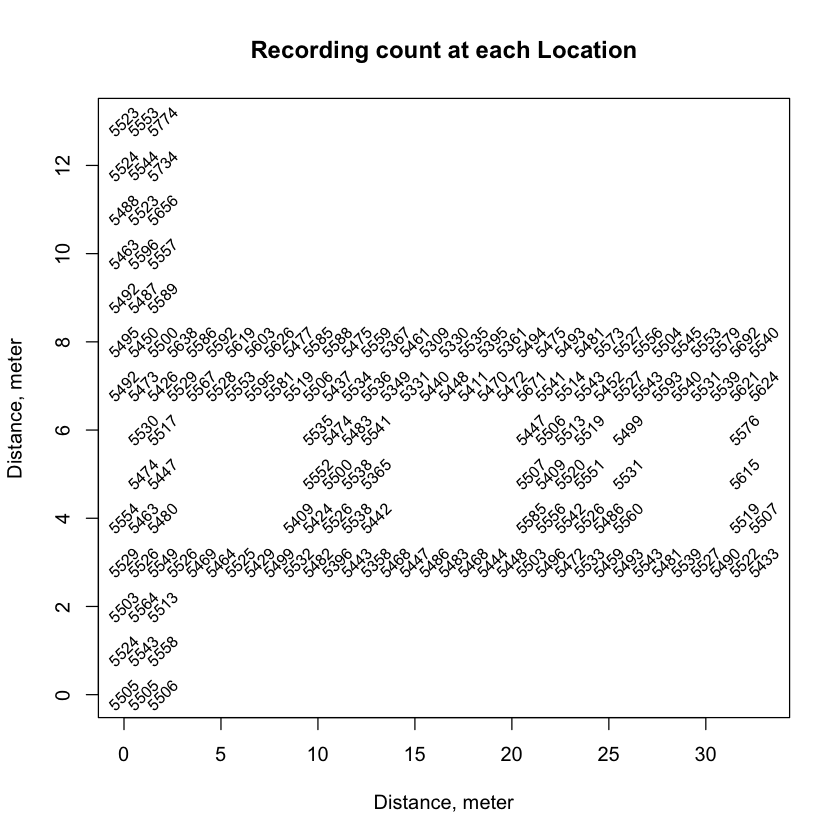

In [37]:
# number of positions
locDF = with(offline, 
             by(offline, list(posX, posY), function(x) x))
# remove nulls
locDF = locDF[ !sapply(locDF, is.null) ]
# number of signals by location
locCounts = sapply(locDF, nrow)
locCounts = sapply(locDF, 
                   function(df) 
                     c(df[1, c("posX", "posY")], count = nrow(df)))                       
locCounts[ , 1:8]
# visualize signals by location
locCounts = t(locCounts)
plot(locCounts, type = "n", main = "Recording count at each Location", 
     xlab = "Distance, meter", ylab = "Distance, meter")
text(locCounts, labels = locCounts[,3], cex = .8, srt = 45)

In [38]:
dim(offline)
head(offline)

[1] 914951      8

time,posX,posY,orientation,mac,signal,rawTime,angle
2006-02-10 23:31:58,0,0,0,00:14:bf:b1:97:8a,-38,1.139643e+12,0
2006-02-10 23:31:58,0,0,0,00:14:bf:b1:97:90,-56,1.139643e+12,0
2006-02-10 23:31:58,0,0,0,00:0f:a3:39:e1:c0,-53,1.139643e+12,0
2006-02-10 23:31:58,0,0,0,00:14:bf:b1:97:8d,-65,1.139643e+12,0
2006-02-10 23:31:58,0,0,0,00:14:bf:b1:97:81,-65,1.139643e+12,0
2006-02-10 23:31:58,0,0,0,00:14:bf:3b:c7:c6,-66,1.139643e+12,0


## Generating the Training dataset

In [39]:
# Nolan and Lang ETL function
readData = 
  function(filename = 'data/offline.final.trace.txt', 
           subMacs = c("00:0f:a3:39:e1:c0", "00:0f:a3:39:dd:cd", "00:14:bf:b1:97:8a",
                       "00:14:bf:3b:c7:c6", "00:14:bf:b1:97:90", "00:14:bf:b1:97:8d",
                       "00:14:bf:b1:97:81"))
  {
    txt = readLines(filename)
    lines = txt[ substr(txt, 1, 1) != "#" ]
    tmp = lapply(lines, processLine)
    offline = as.data.frame(do.call("rbind", tmp), 
                            stringsAsFactors= FALSE) 
    
    names(offline) = c("time", "scanMac", 
                       "posX", "posY", "posZ", "orientation", 
                       "mac", "signal", "channel", "type")
    
    offline = offline[ offline$type == "3", ]
    dropVars = c("scanMac", "posZ", "channel", "type")
    offline = offline[ , !( names(offline) %in% dropVars ) ]
    offline = offline[ offline$mac %in% subMacs, ]
    numVars = c("time", "posX", "posY", "orientation", "signal")
    offline[ numVars ] = lapply(offline[ numVars ], as.numeric)
    offline$rawTime = offline$time
    offline$time = offline$time/1000
    class(offline$time) = c("POSIXt", "POSIXct")
    offline$angle = roundOrientation(offline$orientation)     
    return(offline)
  }


In [40]:
# Check global veriables 
library(codetools)
findGlobals(readData, merge = FALSE)$variables

[1] "as.numeric"  "processLine"

In [41]:
offlineRedo = readData()

In [42]:
#write.csv(offline, file = "Albert.csv")
dim(offline)
head(offline)

[1] 914951      8

time,posX,posY,orientation,mac,signal,rawTime,angle
2006-02-10 23:31:58,0,0,0,00:14:bf:b1:97:8a,-38,1.139643e+12,0
2006-02-10 23:31:58,0,0,0,00:14:bf:b1:97:90,-56,1.139643e+12,0
2006-02-10 23:31:58,0,0,0,00:0f:a3:39:e1:c0,-53,1.139643e+12,0
2006-02-10 23:31:58,0,0,0,00:14:bf:b1:97:8d,-65,1.139643e+12,0
2006-02-10 23:31:58,0,0,0,00:14:bf:b1:97:81,-65,1.139643e+12,0
2006-02-10 23:31:58,0,0,0,00:14:bf:3b:c7:c6,-66,1.139643e+12,0


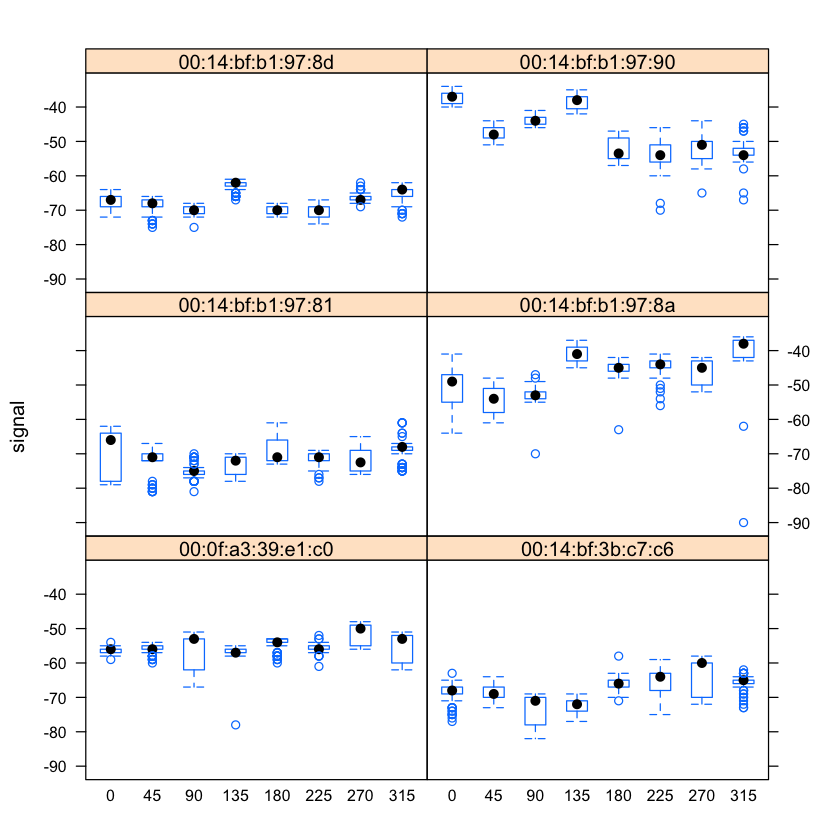

In [43]:
library(lattice)
bwplot(signal ~ factor(angle) | mac, data = offline,
       subset = posX == 2 & posY == 12
                & mac != "00:0f:a3:39:dd:cd",
       layout = c(2,3))

In [44]:
summary(offline$signal)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -98.00  -67.00  -59.00  -59.92  -53.00  -25.00 

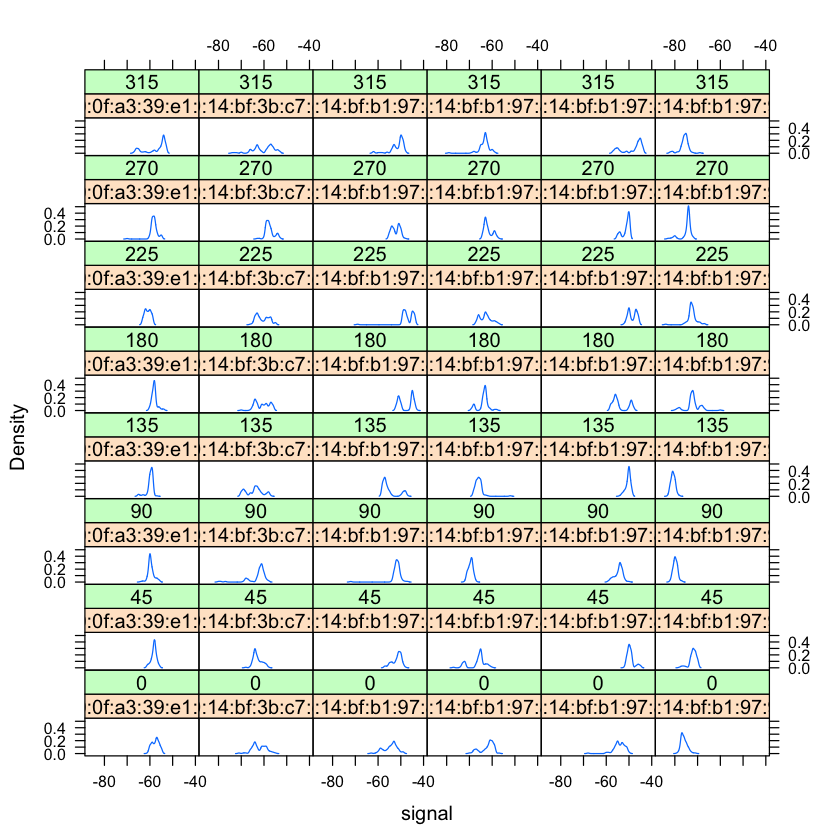

In [45]:
densityplot( ~ signal | mac + factor(angle), data = offline,
             subset = posX == 24 & posY == 4 &
                         mac != "00:0f:a3:39:dd:cd",
             bw = 0.5, plot.points = FALSE)

In [46]:
#offline = offline[ offline$mac != "00:0f:a3:39:dd:cd", ]

offline$posXY = paste(offline$posX, offline$posY, sep = "-")

byLocAngleAP = with(offline, 
                    by(offline, list(posXY, angle, mac), 
                       function(x) x))

signalSummary = 
  lapply(byLocAngleAP,            
         function(oneLoc) {
           ans = oneLoc[1, ]
           ans$medSignal = median(oneLoc$signal)
           ans$avgSignal = mean(oneLoc$signal)
           ans$num = length(oneLoc$signal)
           ans$sdSignal = sd(oneLoc$signal)
           ans$iqrSignal = IQR(oneLoc$signal)
           ans
           })

offlineSummary = do.call("rbind", signalSummary)  

In [47]:
offline$posXY = paste(offline$posX, offline$posY, sep = "-")

In [48]:
byLocAngleAP = with(offline,
                    by(offline, list(posXY, angle, mac),
                       function(x) x))

In [49]:
signalSummary =
  lapply(byLocAngleAP,
         function(oneLoc) {
           ans = oneLoc[1, ]
           ans$medSignal = median(oneLoc$signal)
           ans$avgSignal = mean(oneLoc$signal)
           ans$num = length(oneLoc$signal)
           ans$sdSignal = sd(oneLoc$signal)
           ans$iqrSignal = IQR(oneLoc$signal)
           ans
            })

In [50]:
offlineSummary = do.call("rbind", signalSummary)

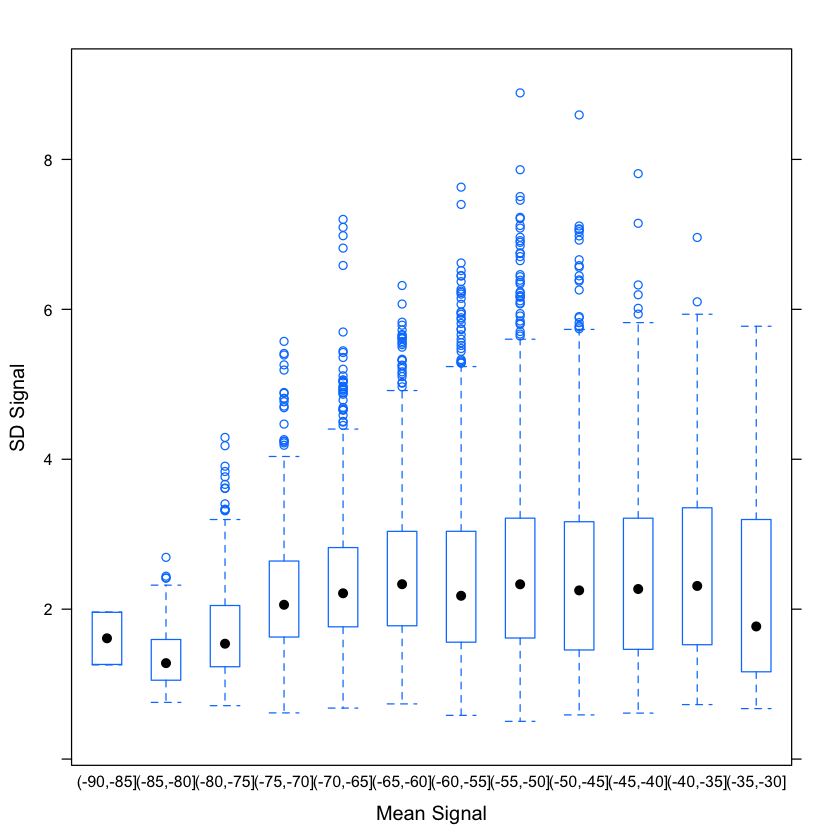

In [51]:
breaks = seq(-90, -30, by = 5)
bwplot(sdSignal ~ cut(avgSignal, breaks = breaks),
       data = offlineSummary,
       subset = mac != "00:0f:a3:39:dd:cd",
       xlab = "Mean Signal", ylab = "SD Signal")